In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

# Import Data

In [3]:
df = pd.read_csv('data/Graduate - IRISES dataset (2019-06).csv', delimiter='|')

In [4]:
feature_cols = [col for col in df.columns if col != 'Species']
target_col = 'Species'

# Feature Engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    object 
 4   Species       150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


Petal Width's type is object, but it should be float64 like the rest of measurements

In [6]:
try:
    df['Petal.Width'].astype('float64')
except Exception as e:
    print(e.args)

("could not convert string to float: '2,2'",)


there is one delimiter instead of dot in data, it has to be changed

In [7]:
Petal_Width = df['Petal.Width'].map(lambda x: x.replace(',', '.'))

In [8]:
print(f"Original Petal Width unique data values \n {df['Petal.Width'].unique()} \n Nr of rows: {df['Petal.Width'].shape[0]} \n")
print(f"Changed Petal Width unique data values \n {Petal_Width.unique()}\n Nr of rows: {Petal_Width.shape[0]}")

Original Petal Width unique data values 
 ['0.2' '0.4' '0.3' '0.1' '0.5' '0.6' '1.4' '1.5' '1.3' '1.6' '1' '1.1'
 '1.8' '1.2' '1.7' '2.5' '1.9' '2.1' '2.2' '2' '2.4' '2.3' '2,2'] 
 Nr of rows: 150 

Changed Petal Width unique data values 
 ['0.2' '0.4' '0.3' '0.1' '0.5' '0.6' '1.4' '1.5' '1.3' '1.6' '1' '1.1'
 '1.8' '1.2' '1.7' '2.5' '1.9' '2.1' '2.2' '2' '2.4' '2.3']
 Nr of rows: 150


Now, when all the values are in valid form, we can transform object to float

In [9]:
df['Petal.Width'] = Petal_Width.astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB



There is another problem, Sepal.Width column has 1 null value

In [11]:
df[pd.isna(df['Sepal.Width'])]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
82,5.5,NaN,3.7,1.0,versicolor


The nan value appears in one of the versicolor flowers. Let's impute a number based on mean value of all versicolor Sepal Widths to cover this problem

In [12]:
Mean_S_Width_Versi = df[df['Species'] == 'versicolor']['Sepal.Width'].values 

In [13]:
df[df['Species'] == 'versicolor']['Sepal.Width'].values

array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2,
       2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. ,
       2.8, 3. , 2.9, 2.6, 2.4, nan, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. ,
       2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8])

In [14]:
df.fillna(df[df['Species'] == 'versicolor']['Sepal.Width'].mean().round(2), inplace=True)

In [15]:
df[df['Species'] == 'versicolor']['Sepal.Width'].values

array([3.2 , 3.2 , 3.1 , 2.3 , 2.8 , 2.8 , 3.3 , 2.4 , 2.9 , 2.7 , 2.  ,
       3.  , 2.2 , 2.9 , 2.9 , 3.1 , 3.  , 2.7 , 2.2 , 2.5 , 3.2 , 2.8 ,
       2.5 , 2.8 , 2.9 , 3.  , 2.8 , 3.  , 2.9 , 2.6 , 2.4 , 2.78, 2.7 ,
       2.7 , 3.  , 3.4 , 3.1 , 2.3 , 3.  , 2.5 , 2.6 , 3.  , 2.6 , 2.3 ,
       2.7 , 3.  , 2.9 , 2.9 , 2.5 , 2.8 ])

Nan value was changed to the mean = 2.78

In [16]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.779333,3.059867,3.758000,1.199333
std,1.197721,0.433116,1.765298,0.762238
min,-4.800000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Another odd thing is that min value of Sepal Length is negative what shouldn't be possible

In [17]:
df[df['Sepal.Length'] < 0]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
25,-4.8,3.4,1.9,0.2,setosa


In [18]:
df[df['Sepal.Length'] >= 0]['Sepal.Length'].mean()

5.850335570469799

The Mean Sepal Length for the valid positive values is 5.85 it is possible that the negative symbol has been written by mistake

In [19]:
df.loc[25, ['Sepal.Length']] *= -1

In [20]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.059867,3.758000,1.199333
std,0.828066,0.433116,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are no more negative values

Now that data is clear, it's time for EDA

# EDA

First lets see how different the measurements are for each species

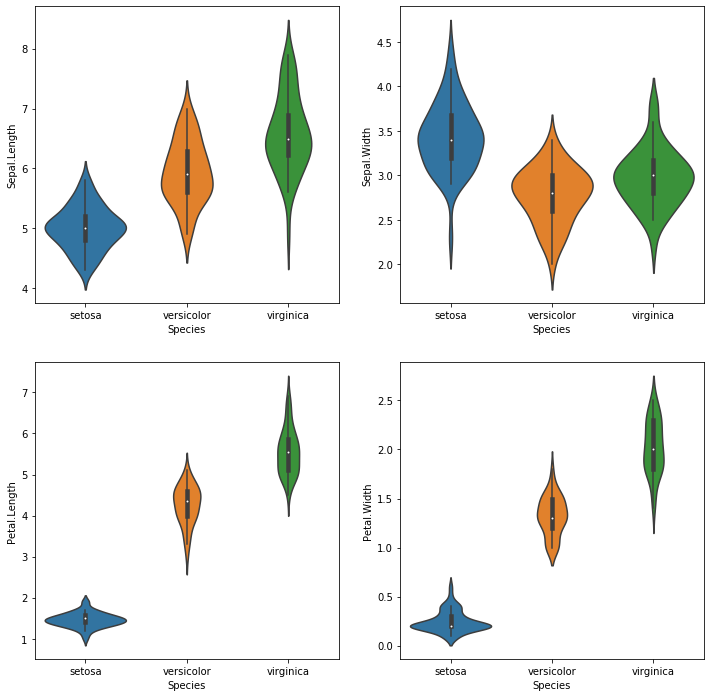

In [21]:
nrows = ncols =  2
fig, axs = plt.subplots(nrows, ncols, figsize=(12,12))
cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

for i in range(4):
    sns.violinplot(x='Species', y=cols[i], data=df, ax=axs[i//nrows, i%ncols])

Every type of flower has its own characteristics, Virginica has longest and Setosa widest Sepal in average. Virginica has longest and widest Petal, and setosa the shortest and the most narrow, when Versicolor's petal is in the middle. 

In [22]:
df_heat = df.copy()

In [23]:
df_heat[['Species']] = df_heat['Species'].factorize()[0]

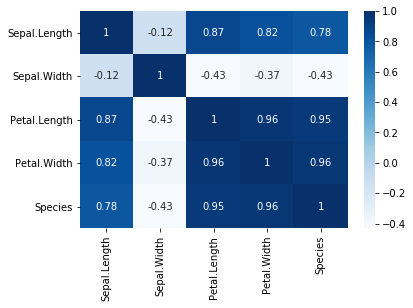

In [24]:
sns.heatmap(df_heat.corr(), annot=True, cmap="Blues")

Every measurement is highly correlated with species type, but as seen in violin plot Petal length and width differentiate species the most.

# Model

In [25]:
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score

In [27]:
X = df[feature_cols]
y = df[target_col]

In [26]:
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_split, y_split, test_size=0.5, random_state=42)

In [27]:
def rf_model_trained():
    rf = RandomForestClassifier(n_estimators=1000)
    rf.fit(X_train, y_train)
    return rf

def print_scores(rf):
    print(f'Accuracy on training data: {rf.score(X_train, y_train)}')
    print(f'Accuracy on validation data: {rf.score(X_val, y_val)}')
    print(f'Accuracy on test data: {rf.score(X_test, y_test)}')

In [28]:
def eval_new_model():
    rf = rf_model_trained()
    print_scores(rf)
    return rf

In [29]:
rf = eval_new_model()
perm = PermutationImportance(rf, random_state=42).fit(X,y)
eli5.show_weights(perm, feature_names=feature_cols)

Accuracy on training data: 1.0
Accuracy on validation data: 1.0
Accuracy on test data: 0.9666666666666667


Weight,Feature
0.1693 ± 0.0354,Petal.Width
0.1467 ± 0.0316,Petal.Length
0.0133 ± 0.0169,Sepal.Width
0.0107 ± 0.0136,Sepal.Length


The Petal Width and Length was the measurements that in the violinplot showed the most difference between species, and as expected these features are the most important in created model. Even having such a small dataset of 150 examples, model has 96% accuracy on test data, and it was trained on only 90 examples.  

## Cross Validation


In [33]:
rf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rf, X, y, cv=10)

In [35]:
print(scores)
print(f'Average accuracy for 10 fold cross validation: {scores.mean()}')

[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Average accuracy for 10 fold cross validation: 0.9666666666666666


Having such a small dataset makes it possible to fastly cross validate created model.
10 fold cross validation average accuracy score is the same as in previous method, even after reducing number of estimators by 700. 